<span style="color:blue"> При оформлении оглавления можно применять ссылки. Пример ниже. MarkDown имеет много возможностей для оформления.

# Анализ характеристик и стоимости квартир.
Источник данных: выгрузка из test.csv.

*Данные: Список квартир с размерами помещений.*

Этапы работы:
1. [Считать файл](#step1)
2. Определить сколько квартир в списке и какое количество 1, 2, 3-комнатных квартир.
3. Рассчитать площадь и объем квартир.
4. Определить квартиры с наименьшей и наибольшей комнатой по площади.
5. Определить квартиры с наименьшей и наибольшей ванной по объему.
6. Рассчитать стоимость квартир исходя из 600 $ за 1 м2.
7. Сохранить в файл xlsx (Адреса, площадь, объем, стоимость).

***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Загрузка и анализ данных <a name="step1"></a>

In [2]:
flats = pd.read_csv('test.csv', sep=';', 
                    decimal=',', dtype={'Дом ' :np.str_, 'Квартира' :np.str_}, encoding='cp1251')

In [3]:
flats.columns = [column.strip() for column in flats.columns]

<span style="color:blue"> Как я писал в прошлый раз в ячейках кода комментарий только по коду, в Markdown ячейках – описание, разъяснения и т. д.

In [4]:
#Создаем новые столбцы с данными.
flats['Адрес'] = flats['Улица'] + ' ' + flats['Дом'] + '-' + flats['Квартира']
flats['Площадь, кв.м.'] = flats['Ширина'] * flats['Длина']
flats['Объем, куб.м.'] = flats['Площадь, кв.м.'] * flats['Высота']
flats['Стоимость, $'] = flats['Площадь, кв.м.'] * 600

In [5]:
#Определяем количества комнат в квартирах.
amount_room = [line for line in flats.groupby('Помещение')['Адрес'].value_counts()['Комната']]

In [6]:
#Формируем словарь в котором значение - количество комната, а ключ - количество квартир с таким количеством комнат.
amount_room_per_flat = {i : amount_room.count(i) for i in range(1, 4)}

In [7]:
flats_info = flats[['Адрес', 'Площадь, кв.м.', 'Объем, куб.м.', 'Стоимость, $']].groupby(['Адрес']).sum()

##### Сводные данные с характеристиками по каждой квартире  

In [8]:
flats_info = flats_info.reset_index()
flats_info

,Адрес,"Площадь, кв.м.","Объем, куб.м.","Стоимость, $"
0,Артема 63-3,43.05,109.7775,25830.0
1,Билецкого 45-35,17.29,44.9540,10374.0
2,Кожара 32-54,29.21,74.4855,17526.0
3,Крайняя 82-5,58.65,152.4900,35190.0
4,Полесская 74-9,42.45,112.4925,25470.0
5,Советвская 1-42,30.09,75.2250,18054.0


##### Распределение квартир по их характеристикам 

<span style="color:blue"> Графики некорректные. Сейчас они показывают непонятно что, и по ним невозможно сравнить стоимость квартир. Это относится и к другим графикам.

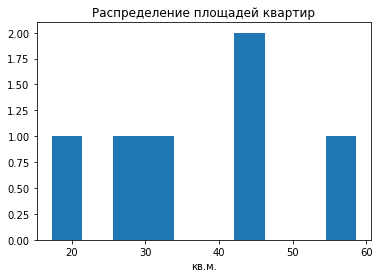

In [9]:
plt.hist(flats_info['Площадь, кв.м.'])
plt.xlabel('кв.м.')
plt.title('Распределение площадей квартир')
plt.show()

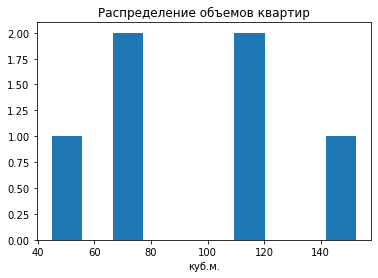

In [10]:
plt.hist(flats_info['Объем, куб.м.'])
plt.xlabel('куб.м.')
plt.title('Распределение объемов квартир')
plt.show()

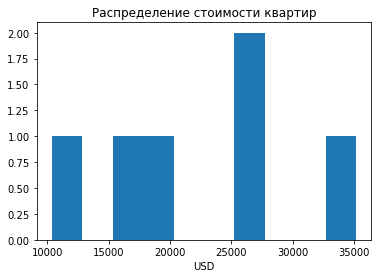

In [11]:
plt.hist(flats_info['Стоимость, $'])
plt.xlabel('USD')
plt.title('Распределение стоимости квартир')
plt.show()

#### Результирующие данные

In [12]:
data = {'Запрашиваемые данные':
        [
            'Количество квартир:',
            'Количество 1-комнатных квартир:',
            'Количество 2-комнатных квартир:',
            'Количество 3-комнатных квартир:',
            'Квартира с наименьшей комнатой по площади:',
            'Квартира с наибольшей комнатой по площади:',
            'Квартира с наименьшей ванной по объему:',
            'Квартира с наибольшей ванной по объему:'],
        'Значение':
            [len(flats["Адрес"].unique()),
             amount_room_per_flat[1],
             amount_room_per_flat[2],
             amount_room_per_flat[3],
             flats['Адрес'].iloc[flats['Площадь, кв.м.'][flats['Помещение'] == 'Комната'].idxmin()],
             flats['Адрес'].iloc[flats['Площадь, кв.м.'][flats['Помещение'] == 'Комната'].idxmax()],
             flats['Адрес'].iloc[flats['Объем, куб.м.'][flats['Помещение'] == 'Ванна'].idxmin()],
             flats['Адрес'].iloc[flats['Объем, куб.м.'][flats['Помещение'] == 'Ванна'].idxmax()]]}

In [13]:
flats_data = pd.DataFrame(data)
flats_data

,Запрашиваемые данные,Значение
0,Количество квартир:,6
1,Количество 1-комнатных квартир:,2
2,Количество 2-комнатных квартир:,3
3,Количество 3-комнатных квартир:,1
4,Квартира с наименьшей комнатой по площади:,Билецкого 45-35
5,Квартира с наибольшей комнатой по площади:,Крайняя 82-5
6,Квартира с наименьшей ванной по объему:,Советвская 1-42
7,Квартира с наибольшей ванной по объему:,Полесская 74-9


In [14]:
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
flats_info.to_excel(writer, sheet_name='Calculations', index=False)
flats_data.to_excel(writer, sheet_name='Analysis', index=False)
writer.save()